In [ ]:
!pip install kaggle

**Importing the Dependencies**

In [ ]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Data Collection- Kaggle API**

In [ ]:
kaggle_dictionary = json.load(open("kaggle.json"))

In [ ]:
kaggle_dictionary.keys()

dict_keys(['username', 'key'])

In [ ]:
# setup kaggle credentials as environment variables
os.environ["KAGGLE_USERNAME"] = kaggle_dictionary["username"]
os.environ["KAGGLE_KEY"] = kaggle_dictionary["key"]

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 47% 12.0M/25.7M [00:00<00:00, 122MB/s]
100% 25.7M/25.7M [00:00<00:00, 148MB/s]


In [ ]:
!ls

imdb-dataset-of-50k-movie-reviews.zip  kaggle.json  sample_data


In [ ]:
# unzip the dataset file
with ZipFile("imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
  zip_ref.extractall()

In [ ]:
!ls

'IMDB Dataset.csv'   imdb-dataset-of-50k-movie-reviews.zip   kaggle.json   sample_data


**Loading the Dataset**

In [ ]:
data = pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
data.shape

(50000, 2)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [ ]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [ ]:
# split data into training data and test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


**Data Preprocessing**

In [ ]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [ ]:
import pickle

# Save the tokenizer to a file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [ ]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [ ]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [ ]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


# MODEL 1

**LSTM - Long Short-Term Memory**

In [ ]:
# build the model

model1 = Sequential()
model1.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(1, activation="sigmoid"))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

**Training the Model**

In [ ]:
history1 = model1.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 [==============================] - 229s 441ms/step - loss: 0.4190 - accuracy: 0.8052 - val_loss: 0.3153 - val_accuracy: 0.8659
Epoch 2/5
500/500 [==============================] - 200s 400ms/step - loss: 0.2712 - accuracy: 0.8903 - val_loss: 0.3403 - val_accuracy: 0.8575
Epoch 3/5
500/500 [==============================] - 206s 412ms/step - loss: 0.2243 - accuracy: 0.9113 - val_loss: 0.3074 - val_accuracy: 0.8788
Epoch 4/5
500/500 [==============================] - 191s 381ms/step - loss: 0.1949 - accuracy: 0.9237 - val_loss: 0.3448 - val_accuracy: 0.8499
Epoch 5/5
500/500 [==============================] - 189s 378ms/step - loss: 0.1609 - accuracy: 0.9390 - val_loss: 0.3440 - val_accuracy: 0.8660


In [ ]:
print(history1.history)

{'loss': [0.4189753234386444, 0.2712145149707794, 0.22427460551261902, 0.19494307041168213, 0.16094931960105896], 'accuracy': [0.8051562309265137, 0.8902812600135803, 0.9113125205039978, 0.9236562252044678, 0.9390312433242798], 'val_loss': [0.31530413031578064, 0.3403351306915283, 0.3074043095111847, 0.3448393940925598, 0.34398961067199707], 'val_accuracy': [0.8658750057220459, 0.8575000166893005, 0.8787500262260437, 0.8498749732971191, 0.8659999966621399]}


**Model Evaluation**

In [ ]:
loss, accuracy = model1.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 [==============================] - 21s 64ms/step - loss: 0.3302 - accuracy: 0.8715
Test Loss: 0.33022451400756836
Test Accuracy: 0.8715000152587891


In [ ]:
loss, accuracy = model1.evaluate(X_train, Y_train)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1250/1250 [==============================] - 85s 68ms/step - loss: 0.1817 - accuracy: 0.9341
Test Loss: 0.18165990710258484
Test Accuracy: 0.9340749979019165


In [ ]:
print(history1.history)

{'loss': [0.4189753234386444, 0.2712145149707794, 0.22427460551261902, 0.19494307041168213, 0.16094931960105896], 'accuracy': [0.8051562309265137, 0.8902812600135803, 0.9113125205039978, 0.9236562252044678, 0.9390312433242798], 'val_loss': [0.31530413031578064, 0.3403351306915283, 0.3074043095111847, 0.3448393940925598, 0.34398961067199707], 'val_accuracy': [0.8658750057220459, 0.8575000166893005, 0.8787500262260437, 0.8498749732971191, 0.8659999966621399]}


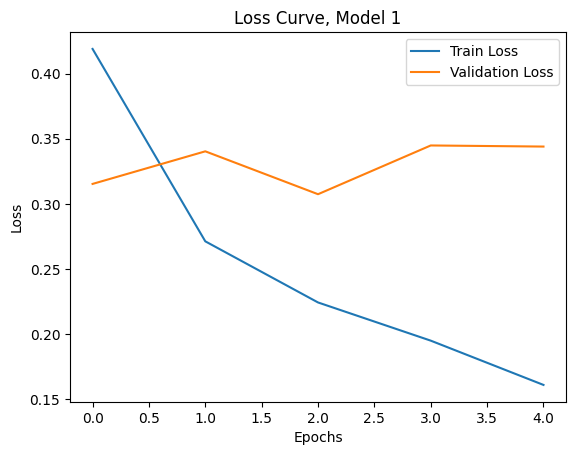

In [ ]:

import matplotlib.pyplot as plt

# Plot the loss curve
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve, Model 1')
plt.legend()
plt.show()


**Building a Predictive System**

In [ ]:
def predict_sentiment_model1(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model1.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  print("===================================================================")
  print(prediction)
  print("===================================================================")
  return sentiment

In [ ]:
# example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment_model1(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 [==============================] - 0s 325ms/step
[[0.9565389]]
The sentiment of the review is: positive


In [ ]:
# example usage
new_review = "This movie was not that good"
sentiment = predict_sentiment_model1(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 [==============================] - 0s 75ms/step
[[0.2094962]]
The sentiment of the review is: negative


In [ ]:

model1.save("sentiment_prediction_model_1.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
loaded_model1 = load_model("sentiment_prediction_model_1.h5")

In [ ]:
def loaded_predict_sentiment_model1(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)

  prediction = loaded_model1.predict(padded_sequence)

  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  print("===================================================================")
  print(prediction)
  print("===================================================================")
  return sentiment

In [ ]:
test_review="I failed to love it"

sentiment = loaded_predict_sentiment_model1(test_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 [==============================] - 0s 276ms/step
[[0.27912685]]
The sentiment of the review is: negative


# MODEL 2

In [ ]:
# Initialize the Sequential model
model2 = Sequential()

# Add the Embedding layer
model2.add(Embedding(input_dim=5000, output_dim=128, input_length=200))

# Add the first LSTM layer
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

# Add the second LSTM layer
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Add the Dense layer for binary classification
model2.add(Dense(1, activation='sigmoid'))

# Summary of the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 200, 128)          131584    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 903297 (3.45 MB)
Trainable params: 903297 (3.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history2 = model2.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 [==============================] - 450s 901ms/step - loss: 0.3123 - accuracy: 0.8724 - val_loss: 0.3169 - val_accuracy: 0.8684
Epoch 2/5
500/500 [==============================] - 445s 889ms/step - loss: 0.2508 - accuracy: 0.8997 - val_loss: 0.3241 - val_accuracy: 0.8625
Epoch 3/5
500/500 [==============================] - 402s 804ms/step - loss: 0.2173 - accuracy: 0.9158 - val_loss: 0.3077 - val_accuracy: 0.8785
Epoch 4/5
500/500 [==============================] - 399s 799ms/step - loss: 0.1863 - accuracy: 0.9280 - val_loss: 0.4133 - val_accuracy: 0.8751
Epoch 5/5
500/500 [==============================] - 401s 802ms/step - loss: 0.1591 - accuracy: 0.9408 - val_loss: 0.3500 - val_accuracy: 0.8763


In [ ]:
loss2, accuracy2 = model2.evaluate(X_test, Y_test)
print(f"Test Loss: {loss2}")
print(f"Test Accuracy: {accuracy2}")

313/313 [==============================] - 38s 122ms/step - loss: 0.3299 - accuracy: 0.8816
Test Loss: 0.32985517382621765
Test Accuracy: 0.881600022315979


In [ ]:
print(history2.history)

{'loss': [0.31228959560394287, 0.2508160471916199, 0.21729019284248352, 0.18626460433006287, 0.1591486781835556], 'accuracy': [0.8724374771118164, 0.8996562361717224, 0.9157812595367432, 0.9280312657356262, 0.9407812356948853], 'val_loss': [0.31692272424697876, 0.3241406977176666, 0.30771929025650024, 0.4133163094520569, 0.3500227630138397], 'val_accuracy': [0.8683750033378601, 0.862500011920929, 0.8784999847412109, 0.875124990940094, 0.8762500286102295]}


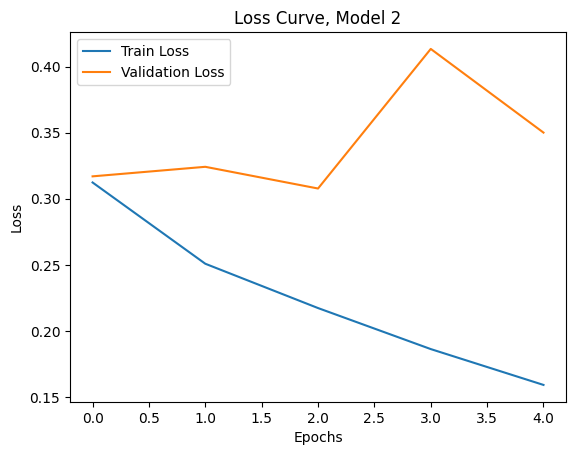

In [ ]:

import matplotlib.pyplot as plt

# Plot the loss curve
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve, Model 2')
plt.legend()
plt.show()


In [ ]:

model2.save("sentiment_prediction_model_2.h5")


In [ ]:
from keras.models import load_model
loaded_model2 = load_model("sentiment_prediction_model_2.h5")

In [ ]:
def loaded_predict_sentiment_model2(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model2.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  print("===================================================================")
  print(prediction)
  print("===================================================================")
  return sentiment

In [ ]:
# example usage
new_review = "Anish, Pragya and Jupiter watched the movie 'dimag kharab'. They loved it."
sentiment = loaded_predict_sentiment_model2(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 [==============================] - 0s 467ms/step
[[0.9210282]]
The sentiment of the review is: positive


In [ ]:
# example usage
new_review = "This movie was fantastic. I loved it."
sentiment = loaded_predict_sentiment_model2(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 [==============================] - 0s 117ms/step
[[0.91307896]]
The sentiment of the review is: positive
